The dataset is sourced: https://www.kaggle.com/datasets/mexwell/drug-consumption-classification

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [249]:
file_path = r"C:\Users\loris\Desktop\Social Re\Social-Research-Project\drug_consumption.csv"
data = pd.read_csv(r"C:\Users\loris\Desktop\Social Re\Social-Research-Project\drug_consumption.csv", sep=',')

### Column values info

Database contains records for 1885 respondents. For each respondent 12 attributes are known: 
Personality measurements which include NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, 
and conscientiousness), BIS-11 (impulsivity), and ImpSS (sensation seeking), level of education, age, gender, country of residence and ethnicity.

All input attributes are originally categorical and are quantified. After quantification values of all input features can be considered as real-valued.

In addition, participants were questioned concerning their use of 18 legal and illegal drugs 
(alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, 
methadone, mushrooms, nicotine and volatile substance abuse and one fictitious drug (Semeron) which was introduced to identify over-claimers).

For each drug they have to select one of the answers: never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day.

Database contains 18 classification problems. Each of independent label variables contains seven classes: 
"Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day".

**Attribute Information:**

- **ID**: ID is number of record in original database. Cannot be related to participant. It can be used for reference only.

- **Age**: Age is the age of participant and has one of the values:
    - -0.95197: 18 - 24
    - -0.07854: 25 - 34
    - 0.49788: 35 - 44
    - 1.09449: 45 - 54
    - 1.82213: 55 - 64
    - 2.59171: 65+
- **Gender**: Gender is gender of participant:
    - 0.48246: Female
    - -0.48246: Male
- **Education**: Education is level of education of participant and has one of the values:
    - -2.43591: Left School Before 16 years
    - -1.73790: Left School at 16 years
    - -1.43719: Left School at 17 years
    - -1.22751: Left School at 18 years
    - -0.61113: Some College, No Certificate Or Degree
    - -0.05921: Professional Certificate/Diploma
    - 0.45468: University Degree
    - 1.16365: Masters Degree
    - 1.98437: Doctorate Degree
- **Country**: Country is country of current residence of participant and has one of the values:
    - -0.09765: Australia
    - 0.24923: Canada
    - -0.46841: New Zealand
    - -0.28519: Other
    - 0.21128: Republic of Ireland
    - 0.96082: UK
    - -0.57009: USA
- **Ethnicity**: Ethnicity is ethnicity of participant and has one of the values:
    - -0.50212: Asian
    - -1.10702: Black
    - 1.90725: Mixed-Black/Asian
    - 0.12600: Mixed-White/Asian
    - -0.22166: Mixed-White/Black
    - 0.11440: Other
    - -0.31685: White

**Nscore**: Nscore is NEO-FFI-R Neuroticism. Neuroticism is one of the Big Five higher-order personality traits in the study of psychology. Individuals who score high on neuroticism are more likely than average to be moody and to experience such feelings as anxiety, worry, fear, anger, frustration, envy, jealousy, guilt, depressed mood, and loneliness.

**EScore**: Escore (Real) is NEO-FFI-R Extraversion. Extraversion is one of the five personality traits of the Big Five personality theory. It indicates how outgoing and social a person is. A person who scores high in extraversion on a personality test is the life of the party. They enjoy being with people, participating in social gatherings, and are full of energy.

**Oscore**: Oscore (Real) is NEO-FFI-R Openness to experience. Openness is one of the five personality traits of the Big Five personality theory. It indicates how open-minded a person is. A person with a high level of openness to experience in a personality test enjoys trying new things. They are imaginative, curious, and open-minded. Individuals who are low in openness to experience would rather not try new things. They are close-minded, literal and enjoy having a routine

**Ascore**: Ascore(Real) is NEO-FFI-R Agreeableness. Agreeableness is one of the five personality traits of the Big Five personality theory. A person with a high level of agreeableness in a personality test is usually warm, friendly, and tactful. They generally have an optimistic view of human nature and get along well with others.

**Cscore**: Cscore (Real) is NEO-FFI-R Conscientiousness. Conscientiousness is one of the five personality traits of the Big Five personality theory. A person scoring high in conscientiousness usually has a high level of self-discipline. These individuals prefer to follow a plan, rather than act spontaneously. Their methodic planning and perseverance usually makes them highly successful in their chosen occupation

**Impulsive**: Impulsive (Real) is impulsiveness measured by BIS-11. In psychology, impulsivity (or impulsiveness) is a tendency to act on a whim, displaying behavior characterized by little or no forethought, reflection, or consideration of the consequences. If you describe someone as impulsive, you mean that they do things suddenly without thinking about them carefully first.

**Sensation**: SS(Real) is sensation seeing measured by ImpSS. Sensation is input about the physical world obtained by our sensory receptors, and perception is the process by which the brain selects, organizes, and interprets these sensations. In other words, senses are the physiological basis of perception.

In [250]:
data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [251]:
age_val = {-0.95197: '18-24',
          -0.07854: '25-34',
          0.49788: '35-44',
          1.09449: '45-54',
          1.82213: '55-64',
          2.59171: '65+'}

data['Age'] = data['Age'].replace(age_val)

In [252]:
gender_val = {0.48246: 'Female', -0.48246: 'Male'}

data['Gender'] = data['Gender'].replace(gender_val)

In [253]:
education_val = {-2.43591: 'Left School Before 16 years',
            -1.73790: 'Left School at 16 years',
            -1.43719: 'Left School at 17 years',
            -1.22751: 'Left School at 18 years',
            -0.61113: 'Some College',
            -0.05921: 'Certificate/ Diploma',
            0.45468: 'University Degree',
            1.16365: 'Masters Degree',
            1.98437: 'Doctorate Degree'}

data['Education'] = data['Education'].replace(education_val)

In [254]:
country_val = {-0.09765: 'Australia',
            0.24923: 'Canada',
            -0.46841: 'New Zealand',
            -0.28519: 'Other',
            0.21128: 'Republic of Ireland',
            0.96082: 'UK',
            -0.57009: 'USA'}

data['Country'] = data['Country'].replace(country_val)

In [255]:
ethnicity_val = {-0.50212: 'Asian',
            -1.10702: 'Black',
            1.90725: 'Mixed-Black/Asian',
            0.12600: 'Mixed-White/Asian',
            -0.22166: 'Mixed-White/Black',
            0.11440: 'Other',
            -0.31685: 'White'}

data['Ethnicity'] = data['Ethnicity'].replace(ethnicity_val)

In [256]:
usage_val = {
    'CL0': 0,
    'CL1': 1,
    'CL2': 2,
    'CL3': 3,
    'CL4': 4,
    'CL5': 5,
    'CL6': 6}

drugs = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin',
         'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']

for drug in drugs:
    data[drug] = data[drug].replace(usage_val)

In [257]:
data.columns

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')

In [258]:
data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35-44,Female,Certificate/ Diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,0,0,0,0,0,0,0,2,0,0
1,2,25-34,Male,Doctorate Degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,4,0,2,0,2,3,0,4,0,0
2,3,35-44,Male,Certificate/ Diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,1,0,0,0
3,4,18-24,Female,Masters Degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,2,0,0,0,0,2,0,0
4,5,35-44,Female,Doctorate Degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,1,0,0,1,0,0,2,2,0,0


In [259]:
data.tail()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
1880,1884,18-24,Female,Some College,USA,White,-1.19430,1.74091,1.88511,0.76096,...,0,0,0,3,3,0,0,0,0,5
1881,1885,18-24,Male,Some College,USA,White,-0.24649,1.74091,0.58331,0.76096,...,2,0,0,3,5,4,4,5,0,0
1882,1886,25-34,Female,University Degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,...,4,0,2,0,2,0,2,6,0,0
1883,1887,18-24,Female,Some College,USA,White,0.91093,-1.92173,0.29338,-1.62090,...,3,0,0,3,3,0,3,4,0,0
1884,1888,18-24,Male,Some College,Republic of Ireland,White,-0.46725,2.12700,1.65653,1.11406,...,3,0,0,3,3,0,3,6,0,2


In [260]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   object 
 2   Gender     1885 non-null   object 
 3   Education  1885 non-null   object 
 4   Country    1885 non-null   object 
 5   Ethnicity  1885 non-null   object 
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   int64  
 14  Amphet     1885 non-null   int64  
 15  Amyl       1885 non-null   int64  
 16  Benzos     1885 non-null   int64  
 17  Caff       1885 non-null   int64  
 18  Cannabis   1885 non-null   int64  
 19  Choc       1885 non-null   int64  
 20  Coke    

In [261]:
data

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35-44,Female,Certificate/ Diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,0,0,0,0,0,0,0,2,0,0
1,2,25-34,Male,Doctorate Degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,4,0,2,0,2,3,0,4,0,0
2,3,35-44,Male,Certificate/ Diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,1,0,0,0
3,4,18-24,Female,Masters Degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,2,0,0,0,0,2,0,0
4,5,35-44,Female,Doctorate Degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,1,0,0,1,0,0,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,18-24,Female,Some College,USA,White,-1.19430,1.74091,1.88511,0.76096,...,0,0,0,3,3,0,0,0,0,5
1881,1885,18-24,Male,Some College,USA,White,-0.24649,1.74091,0.58331,0.76096,...,2,0,0,3,5,4,4,5,0,0
1882,1886,25-34,Female,University Degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,...,4,0,2,0,2,0,2,6,0,0
1883,1887,18-24,Female,Some College,USA,White,0.91093,-1.92173,0.29338,-1.62090,...,3,0,0,3,3,0,3,4,0,0


In [262]:
data.set_index('ID', inplace=True)

In [263]:
data.describe()

,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
count,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,...,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292,4.635013,1.340584,0.606897,...,1.314058,0.374005,0.569231,1.355968,1.061538,0.826525,1.187268,3.200531,0.009549,0.433422
std,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701,1.331253,1.783587,1.064210,...,1.647567,1.034779,1.220015,1.789647,1.491103,1.646632,1.466341,2.413932,0.159331,0.962375
min,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870,5.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
75%,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400,6.000000,2.000000,1.000000,...,3.000000,0.000000,0.000000,3.000000,2.000000,0.000000,2.000000,6.000000,0.000000,0.000000
max,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,4.000000,6.000000


# Visualizzo i dati categorici

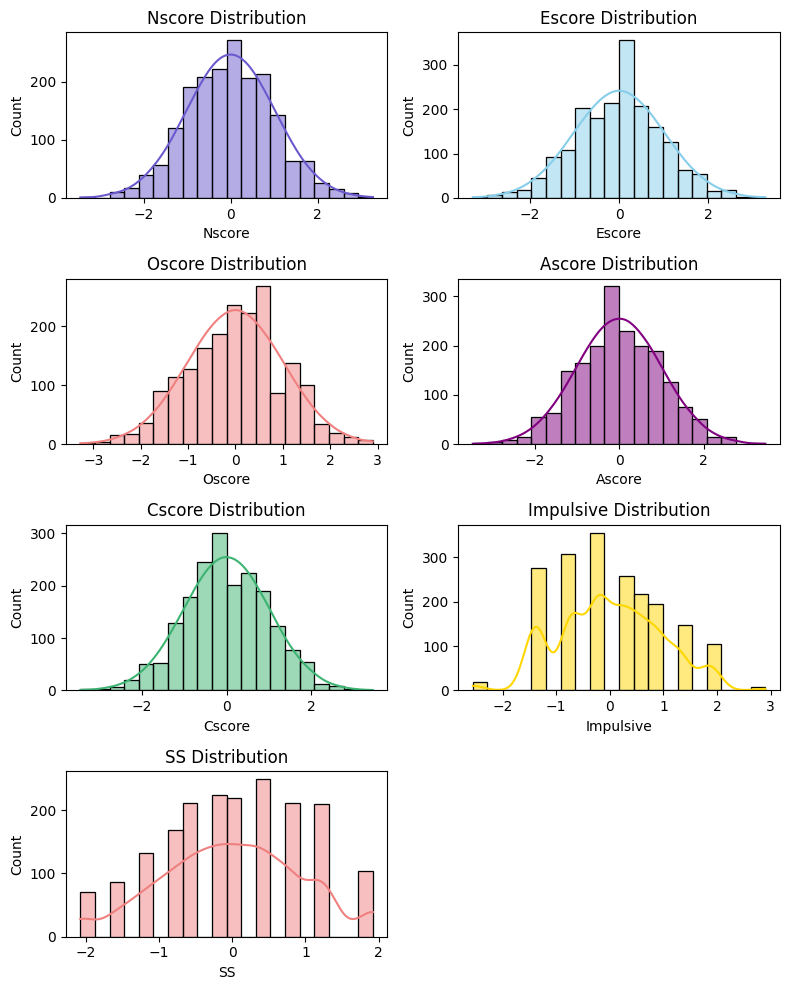

In [264]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(4, 2, figsize=(8, 10))

sns.histplot(data['Nscore'], kde=True, bins=20, ax=axs[0, 0], color='slateblue')
axs[0, 0].set_title('Nscore Distribution')
axs[0, 0].set_ylabel('Count')

sns.histplot(data['Escore'], kde=True, bins=20, ax=axs[0, 1], color='skyblue')
axs[0, 1].set_title('Escore Distribution')
axs[0, 1].set_ylabel('Count')

sns.histplot(data['Oscore'], kde=True, bins=20, ax=axs[1, 0], color='lightcoral')
axs[1, 0].set_title('Oscore Distribution')
axs[1, 0].set_ylabel('Count')

sns.histplot(data['Ascore'], kde=True, bins=20, ax=axs[1, 1], color='purple')
axs[1, 1].set_title('Ascore Distribution')
axs[1, 1].set_ylabel('Count')

sns.histplot(data['Cscore'], kde=True, bins=20, ax=axs[2, 0], color='mediumseagreen')
axs[2, 0].set_title('Cscore Distribution')
axs[2, 0].set_ylabel('Count')

sns.histplot(data['Impulsive'], kde=True, bins=20, ax=axs[2, 1], color='gold')
axs[2, 1].set_title('Impulsive Distribution')
axs[2, 1].set_ylabel('Count')

sns.histplot(data['SS'], kde=True, bins=20, ax=axs[3, 0], color='lightcoral')
axs[3, 0].set_title('SS Distribution')
axs[3, 0].set_ylabel('Count')

fig.delaxes(axs[3, 1])

plt.tight_layout()
plt.show()


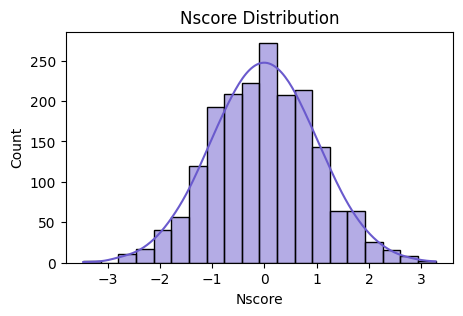

In [265]:
plt.figure(figsize=(5, 3))
sns.histplot(data['Nscore'], kde=True, bins=20, color='slateblue')
plt.title('Nscore Distribution')
plt.ylabel('Count')
plt.xlabel('Nscore')
plt.show()

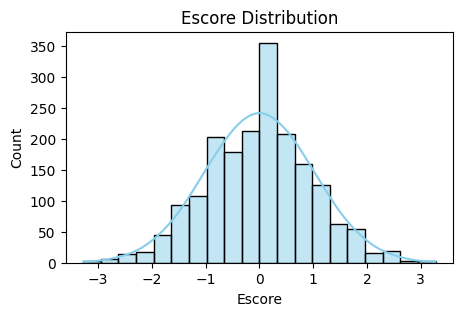

In [266]:
plt.figure(figsize=(5, 3))
sns.histplot(data['Escore'], kde=True, bins=20, color='skyblue')
plt.title('Escore Distribution')
plt.ylabel('Count')
plt.xlabel('Escore')
plt.show()

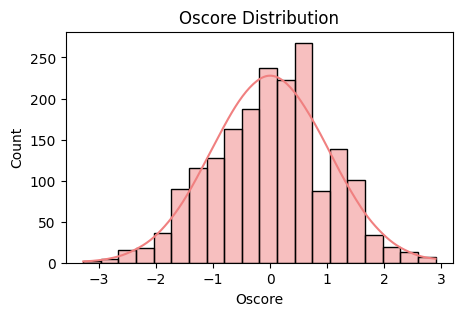

In [267]:
plt.figure(figsize=(5, 3))
sns.histplot(data['Oscore'], kde=True, bins=20, color='lightcoral')
plt.title('Oscore Distribution')
plt.ylabel('Count')
plt.xlabel('Oscore')
plt.show()

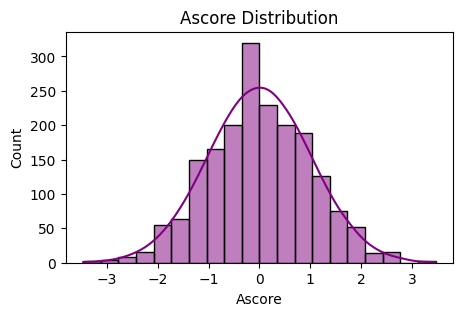

In [268]:
plt.figure(figsize=(5, 3))
sns.histplot(data['Ascore'], kde=True, bins=20, color='purple')
plt.title('Ascore Distribution')
plt.ylabel('Count')
plt.xlabel('Ascore')
plt.show()

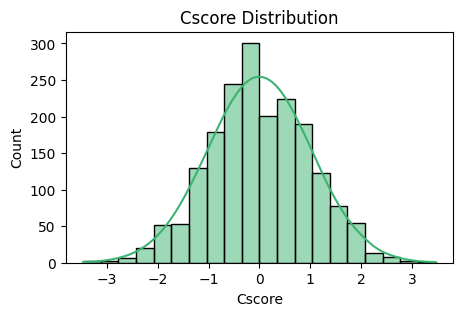

In [269]:
plt.figure(figsize=(5, 3))
sns.histplot(data['Cscore'], kde=True, bins=20, color='mediumseagreen')
plt.title('Cscore Distribution')
plt.ylabel('Count')
plt.xlabel('Cscore')
plt.show()

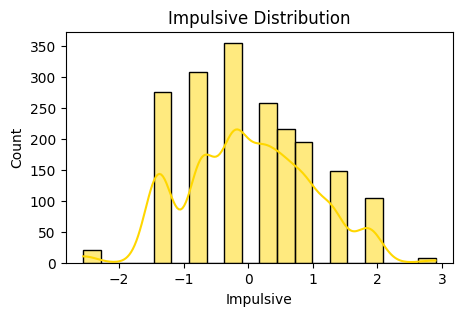

In [270]:
plt.figure(figsize=(5, 3))
sns.histplot(data['Impulsive'], kde=True, bins=20, color='gold')
plt.title('Impulsive Distribution')
plt.ylabel('Count')
plt.xlabel('Impulsive')
plt.show()

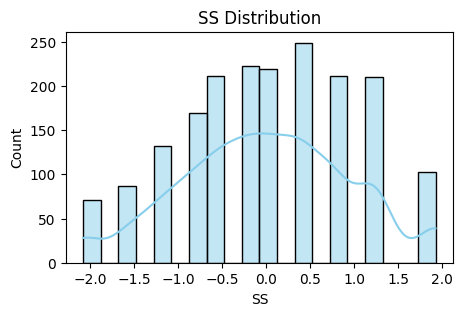

In [271]:
plt.figure(figsize=(5, 3))
sns.histplot(data['SS'], kde=True, bins=20, color='skyblue')
plt.title('SS Distribution')
plt.ylabel('Count')
plt.xlabel('SS')
plt.show()

C:\Users\loris\AppData\Local\Temp\ipykernel_16872\4166344134.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 1].set_xticklabels(education_counts.index, rotation=80)
C:\Users\loris\AppData\Local\Temp\ipykernel_16872\4166344134.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 0].set_xticklabels(country_counts.index, rotation=45)
C:\Users\loris\AppData\Local\Temp\ipykernel_16872\4166344134.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 1].set_xticklabels(ethnicity_counts.index, rotation=45)


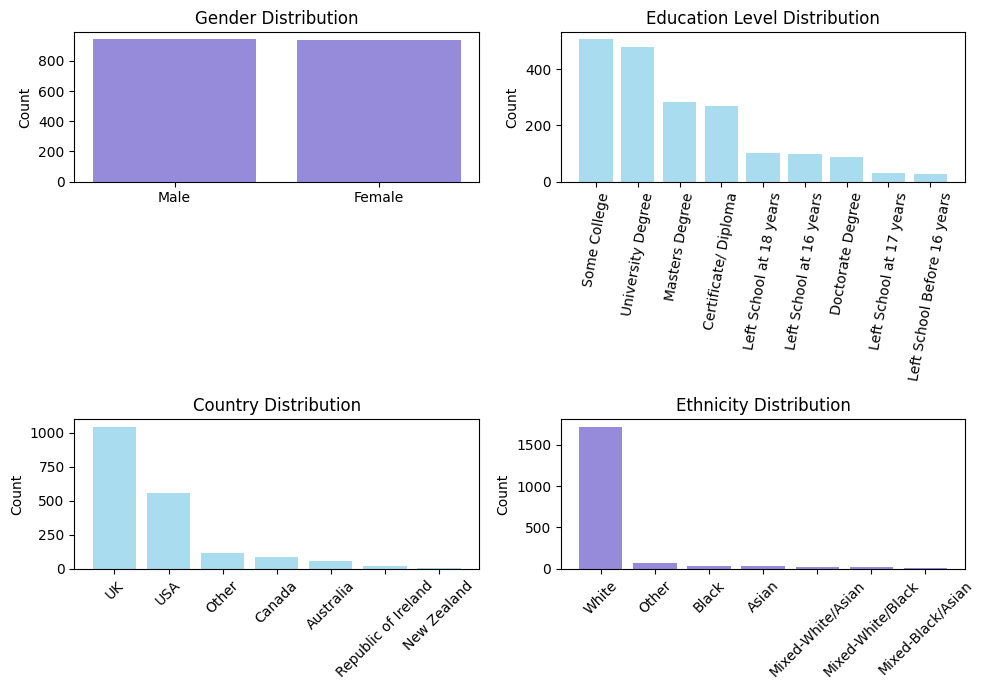

In [272]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

gender_counts = data['Gender'].value_counts()
axs[0, 0].bar(gender_counts.index, gender_counts.values, alpha=0.7, color='slateblue')
axs[0, 0].set_title('Gender Distribution')
axs[0, 0].set_ylabel('Count')

education_counts = data['Education'].value_counts()
axs[0, 1].bar(education_counts.index, education_counts.values, alpha=0.7, color='skyblue')
axs[0, 1].set_title('Education Level Distribution')
axs[0, 1].set_ylabel('Count')
axs[0, 1].set_xticklabels(education_counts.index, rotation=80)

country_counts = data['Country'].value_counts()
axs[1, 0].bar(country_counts.index, country_counts.values, alpha=0.7, color='skyblue')
axs[1, 0].set_title('Country Distribution')
axs[1, 0].set_ylabel('Count')
axs[1, 0].set_xticklabels(country_counts.index, rotation=45)

ethnicity_counts = data['Ethnicity'].value_counts()
axs[1, 1].bar(ethnicity_counts.index, ethnicity_counts.values, alpha=0.7, color='slateblue')
axs[1, 1].set_title('Ethnicity Distribution')
axs[1, 1].set_ylabel('Count')
axs[1, 1].set_xticklabels(ethnicity_counts.index, rotation=45)

plt.tight_layout()
plt.show()

In [273]:
data[drugs].describe()

,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
count,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,4.635013,1.340584,0.606897,1.465252,5.483820,2.989390,5.106631,1.161273,0.297613,1.314058,0.374005,0.569231,1.355968,1.061538,0.826525,1.187268,3.200531,0.009549,0.433422
std,1.331253,1.783587,1.064210,1.867275,1.114648,2.287438,1.089315,1.513031,0.837053,1.647567,1.034779,1.220015,1.789647,1.491103,1.646632,1.466341,2.413932,0.159331,0.962375
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000,5.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000,6.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
75%,6.000000,2.000000,1.000000,3.000000,6.000000,5.000000,6.000000,2.000000,0.000000,3.000000,0.000000,0.000000,3.000000,2.000000,0.000000,2.000000,6.000000,0.000000,0.000000
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,4.000000,6.000000


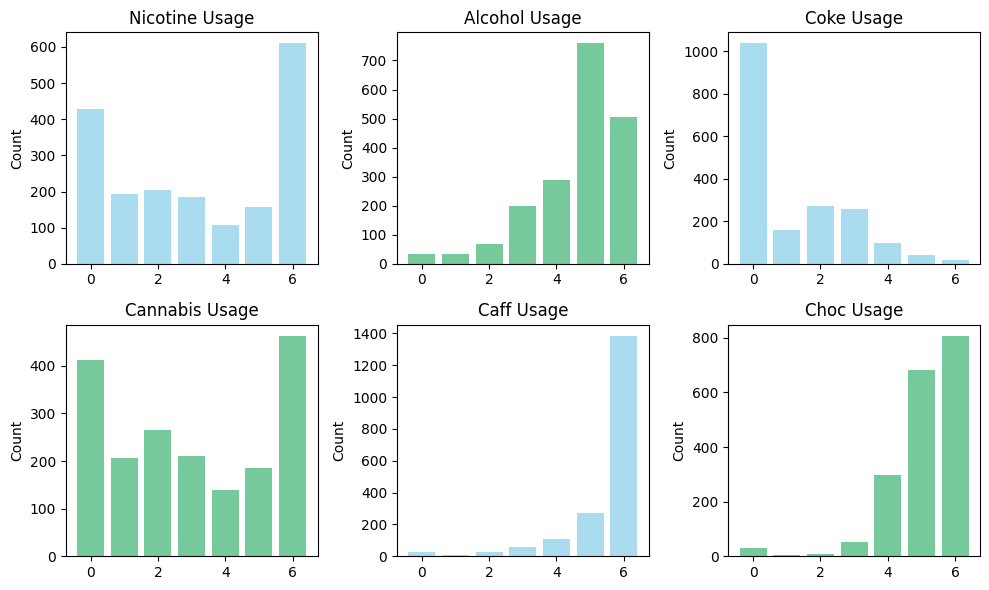

In [274]:
fig, axs = plt.subplots(2, 3, figsize=(10, 6))

nicotine_counts = data['Nicotine'].value_counts().sort_index()
axs[0, 0].bar(nicotine_counts.index, nicotine_counts.values, alpha=0.7, color = 'skyblue')
axs[0, 0].set_title('Nicotine Usage')
axs[0, 0].set_ylabel('Count')

alcohol_counts = data['Alcohol'].value_counts().sort_index()
axs[0, 1].bar(alcohol_counts.index, alcohol_counts.values, alpha=0.7, color ='mediumseagreen')
axs[0, 1].set_title('Alcohol Usage')
axs[0, 1].set_ylabel('Count')

nicotine_counts = data['Coke'].value_counts().sort_index()
axs[0, 2].bar(nicotine_counts.index, nicotine_counts.values, alpha=0.7, color='skyblue')
axs[0, 2].set_title('Coke Usage')
axs[0, 2].set_ylabel('Count')

nicotine_counts = data['Cannabis'].value_counts().sort_index()
axs[1, 0].bar(nicotine_counts.index, nicotine_counts.values, alpha=0.7, color = 'mediumseagreen')
axs[1, 0].set_title('Cannabis Usage')
axs[1, 0].set_ylabel('Count')

nicotine_counts = data['Caff'].value_counts().sort_index()
axs[1, 1].bar(nicotine_counts.index, nicotine_counts.values, alpha=0.7, color = 'skyblue')
axs[1, 1].set_title('Caff Usage')
axs[1, 1].set_ylabel('Count')

nicotine_counts = data['Choc'].value_counts().sort_index()
axs[1, 2].bar(nicotine_counts.index, nicotine_counts.values, alpha=0.7, color = 'mediumseagreen')
axs[1, 2].set_title('Choc Usage')
axs[1, 2].set_ylabel('Count')

plt.tight_layout()
plt.show()

0: Never Used  
1: Used over a Decade Ago  
2: Used in Last Decade  
3: Used in Last Year  
4: Used in Last Month  
5: Used in Last Week  
6: Used in Last Day  

In [275]:
data['Age'] 

ID
1       35-44
2       25-34
3       35-44
4       18-24
5       35-44
        ...  
1884    18-24
1885    18-24
1886    25-34
1887    18-24
1888    18-24
Name: Age, Length: 1885, dtype: object

In [276]:
from sklearn.preprocessing import OrdinalEncoder
age_order = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
ordinal_encoder = OrdinalEncoder(categories=[age_order])
data['Age'] = ordinal_encoder.fit_transform(data[['Age']])

education_order = ['Left School Before 16 years', 'Left School at 16 years', 'Left School at 17 years', 
    'Left School at 18 years', 'Some College', 'Certificate/ Diploma', 
    'University Degree', 'Masters Degree', 'Doctorate Degree']
ordinal_encoder_education = OrdinalEncoder(categories=[education_order])
data['Education'] = ordinal_encoder_education.fit_transform(data[['Education']])


In [277]:
data['Age']

ID
1       2.0
2       1.0
3       2.0
4       0.0
5       2.0
       ... 
1884    0.0
1885    0.0
1886    1.0
1887    0.0
1888    0.0
Name: Age, Length: 1885, dtype: float64

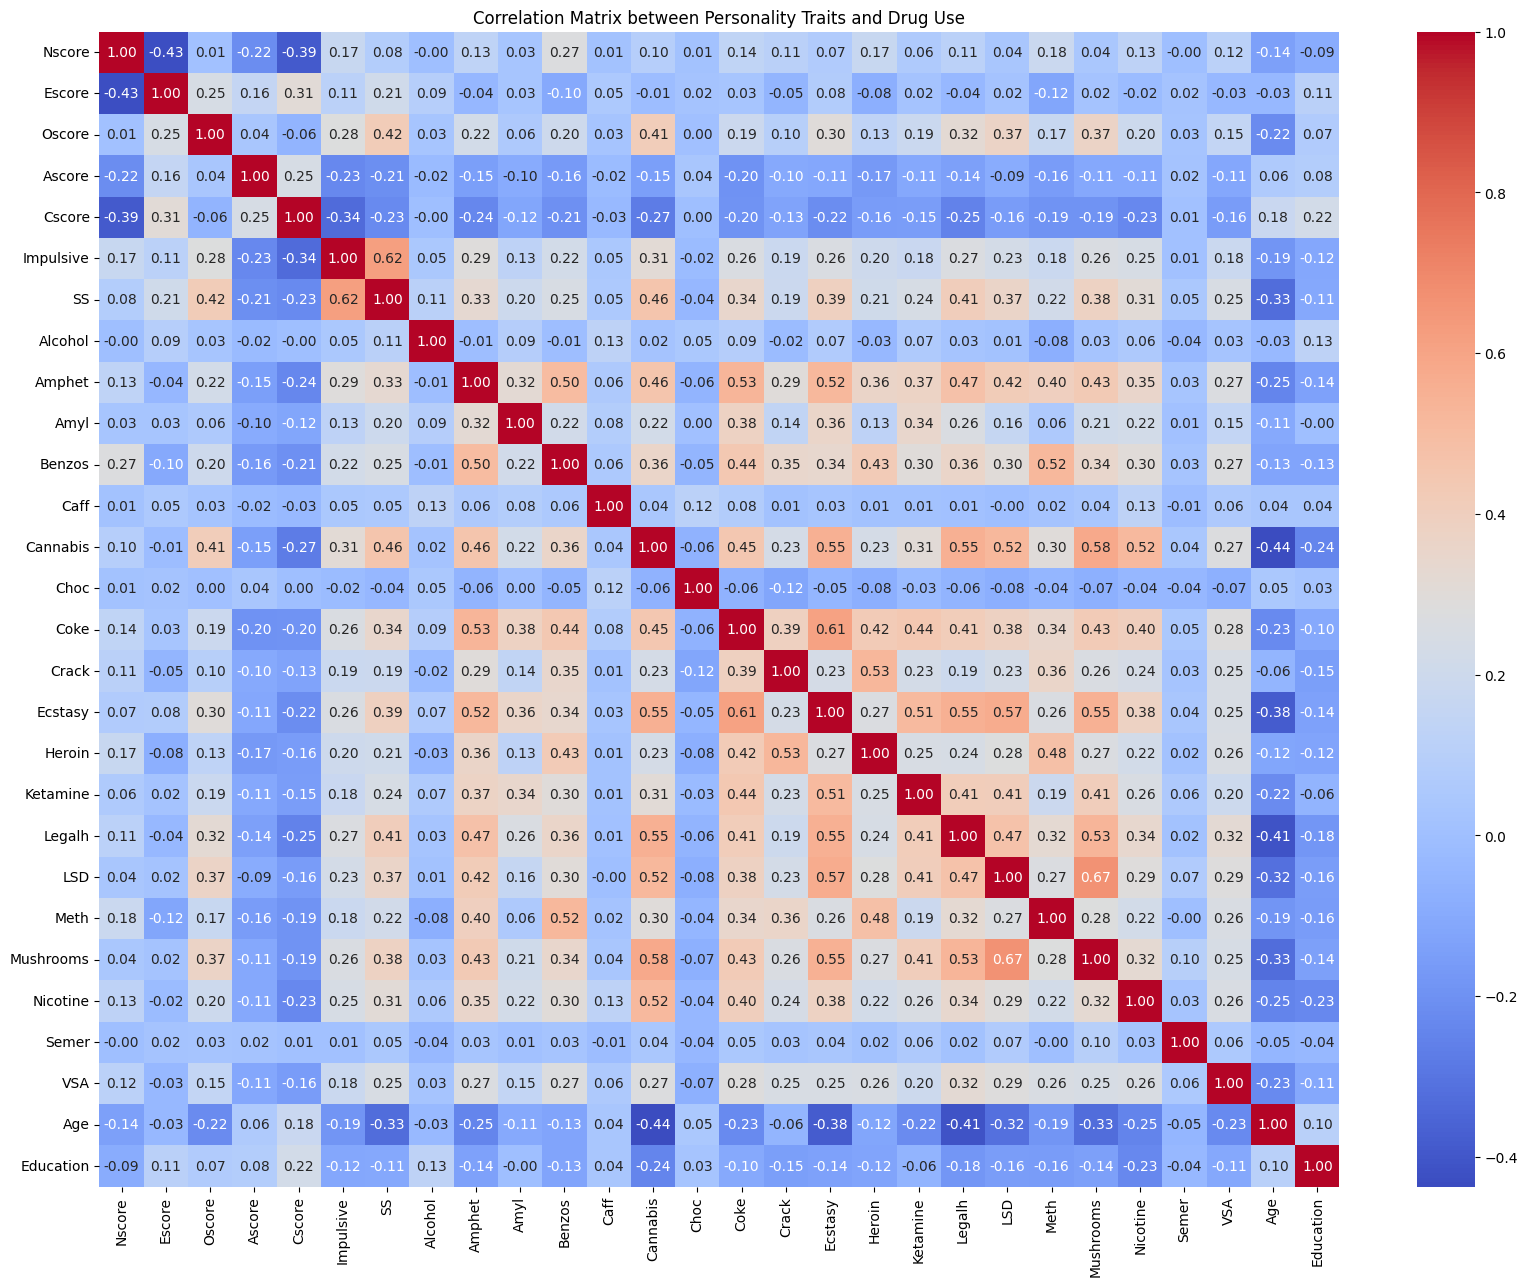

In [278]:
traits = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']

correlation_data = data[traits + drugs + ['Age'] + ['Education']]

correlation_matrix = correlation_data.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Personality Traits and Drug Use')
plt.show()

**Principal Results**

Impulsivity and Sensation Seeking appear to be strongly correlated with each other and show positive correlations with the use of stimulant drugs such as Cocaine and Crack. 

Conscientiousness shows negative correlations with various types of drug use, suggesting that individuals with high scores in this trait are less likely to use drugs.

Oscore (Openness to Experience) is positively correlated with the use of drugs such as LSD and Mushrooms (also high correlated each other), as well as Cannabis.

Nscore (Neuroticism) is negatively correlated with both Escore (Extraversion) and Cscore (Conscientiousness) because Neuroticism is associated with emotional instability and a tendency to experience negative emotions, while Extraversion and Conscientiousness are linked to higher levels of emotional stability and more resilient behaviors. 
High neuroticism often leads to behaviors such as avoidance and withdrawal, which are opposite to the social and organized behaviors typical of high extraversion and conscientiousness. These fundamental differences in emotional and behavioral tendencies explain the observed negative correlations.

Increasing the Age the drug use decrease

# MODEL

In [279]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix

In [280]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])


In [281]:
data = pd.get_dummies(data, columns=['Country'])
data = pd.get_dummies(data, columns=['Ethnicity'])

In [282]:
data

,Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,...,Country_Republic of Ireland,Country_UK,Country_USA,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Mixed-Black/Asian,Ethnicity_Mixed-White/Asian,Ethnicity_Mixed-White/Black,Ethnicity_Other,Ethnicity_White
ID,,,,,,,,,,,,,,,,,,,,,
1,2.0,0,5.0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,...,False,True,False,False,False,False,True,False,False,False
2,1.0,1,8.0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,...,False,True,False,False,False,False,False,False,False,True
3,2.0,1,5.0,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,...,False,True,False,False,False,False,False,False,False,True
4,0.0,0,7.0,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,...,False,True,False,False,False,False,False,False,False,True
5,2.0,0,8.0,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,0.0,0,4.0,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,...,False,False,True,False,False,False,False,False,False,True
1885,0.0,1,4.0,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,...,False,False,True,False,False,False,False,False,False,True
1886,1.0,0,6.0,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,...,False,False,True,False,False,False,False,False,False,True


In [283]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data['Coke_Use'] = data['Coke'].apply(lambda x: 0 if x in [0, 1, 2] else 1)
data['Nicotine_Use'] = data['Nicotine'].apply(lambda x: 0 if x in [0, 1, 2] else 1)
data['Alcohol_Use'] = data['Alcohol'].apply(lambda x: 0 if x in [0, 1, 2] else 1)
data['Cannabis_Use'] = data['Cannabis'].apply(lambda x: 0 if x in [0, 1, 2] else 1)


In [284]:
data.columns

Index(['Age', 'Gender', 'Education', 'Nscore', 'Escore', 'Oscore', 'Ascore',
       'Cscore', 'Impulsive', 'SS', 'Alcohol', 'Amphet', 'Amyl', 'Benzos',
       'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin',
       'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer',
       'VSA', 'Country_Australia', 'Country_Canada', 'Country_New Zealand',
       'Country_Other', 'Country_Republic of Ireland', 'Country_UK',
       'Country_USA', 'Ethnicity_Asian', 'Ethnicity_Black',
       'Ethnicity_Mixed-Black/Asian', 'Ethnicity_Mixed-White/Asian',
       'Ethnicity_Mixed-White/Black', 'Ethnicity_Other', 'Ethnicity_White',
       'Coke_Use', 'Nicotine_Use', 'Alcohol_Use', 'Cannabis_Use'],
      dtype='object')

**Model RF Nicotine**

In [285]:
features = traits + ['Age', 'Gender', 'Education', 'Country_Australia', 'Country_Canada', 'Country_New Zealand',
       'Country_Other', 'Country_Republic of Ireland', 'Country_UK',
       'Country_USA', 'Ethnicity_Asian', 'Ethnicity_Black',
       'Ethnicity_Mixed-Black/Asian', 'Ethnicity_Mixed-White/Asian',
       'Ethnicity_Mixed-White/Black', 'Ethnicity_Other', 'Ethnicity_White']
target = 'Nicotine_Use'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

print(f'Results for {target} with Random Forest:')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_rf))
print('Accuracy Score:', accuracy_score(y_test, y_pred_rf))

Results for Nicotine_Use with Random Forest:
Confusion Matrix:
 [[103  66]
 [ 45 163]]
Accuracy Score: 0.7055702917771883


In [286]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_rf, X, y, cv=10)
cv_errors = [1 - score for score in cv_scores]

print('Mean Cross-Validation Score:', np.mean(cv_scores))
print('Mean Cross-Validation Error:', np.mean(cv_errors))

Mean Cross-Validation Score: 0.7071738151525386
Mean Cross-Validation Error: 0.2928261848474615


**Model LDA Nicotine**

In [287]:
model_lda = LinearDiscriminantAnalysis()

model_lda.fit(X_train, y_train)

y_pred_lda = model_lda.predict(X_test)

print(f'Results for {target} with Linear Discriminant Analysis:')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_rf))
print('Accuracy Score:', accuracy_score(y_test, y_pred_rf))

Results for Nicotine_Use with Linear Discriminant Analysis:
Confusion Matrix:
 [[103  66]
 [ 45 163]]
Accuracy Score: 0.7055702917771883


In [288]:
cv_scores_lda = cross_val_score(model_lda, X, y, cv=10)
cv_errors_lda = [1 - score for score in cv_scores_lda]

print('LDA Mean Cross-Validation Score:', np.mean(cv_scores_lda))
print('LDA Mean Cross-Validation Error:', np.mean(cv_errors_lda))

LDA Mean Cross-Validation Score: 0.7082432736688056
LDA Mean Cross-Validation Error: 0.2917567263311944


**Model LR Nicotine**

In [289]:
from sklearn.linear_model import LogisticRegression
model_log_reg = LogisticRegression(max_iter=1000, random_state=42)
model_log_reg.fit(X_train, y_train)

y_pred_log_reg = model_log_reg.predict(X_test)

print(f'Results for {target} with Logistic Regression:')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_rf))
print('Accuracy Score:', accuracy_score(y_test, y_pred_rf))


Results for Nicotine_Use with Logistic Regression:
Confusion Matrix:
 [[103  66]
 [ 45 163]]
Accuracy Score: 0.7055702917771883


In [290]:
model_lr = LogisticRegression(max_iter=1000, random_state=42)

cv_scores_lr = cross_val_score(model_lr, X, y, cv=10)
cv_errors_lr = [1 - score for score in cv_scores_lr]


print('Logistic Regression Mean Cross-Validation Score:', np.mean(cv_scores_lr))
print('Logistic Regression Mean Cross-Validation Error:', np.mean(cv_errors_lr))

Logistic Regression Mean Cross-Validation Score: 0.707719801868738
Logistic Regression Mean Cross-Validation Error: 0.29228019813126194


**Model LDA Coke**

In [291]:
target = 'Coke_Use'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_lda = LinearDiscriminantAnalysis()

model_lda.fit(X_train, y_train)

y_pred_lda = model_lda.predict(X_test)

print(f'Results for {target} with Linear Discriminant Analysis:')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_rf))
print('Accuracy Score:', accuracy_score(y_test, y_pred_rf))

Results for Coke_Use with Linear Discriminant Analysis:
Confusion Matrix:
 [[144 154]
 [  4  75]]
Accuracy Score: 0.5809018567639257


In [292]:
cv_scores_lda = cross_val_score(model_lda, X, y, cv=10)
cv_errors_lda = [1 - score for score in cv_scores_lda]

print('LDA Mean Cross-Validation Score:', np.mean(cv_scores_lda))
print('LDA Mean Cross-Validation Error:', np.mean(cv_errors_lda))

LDA Mean Cross-Validation Score: 0.7766126308679501
LDA Mean Cross-Validation Error: 0.22338736913204998


**Model RF Coke**

In [293]:
target = 'Coke_Use'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

print(f'Results for {target} with Random Forest:')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_rf))
print('Accuracy Score:', accuracy_score(y_test, y_pred_rf))

Results for Coke_Use with Random Forest:
Confusion Matrix:
 [[282  16]
 [ 56  23]]
Accuracy Score: 0.8090185676392573


In [294]:
cv_scores = cross_val_score(model_rf, X, y, cv=10)
cv_errors = [1 - score for score in cv_scores]

print('Mean Cross-Validation Score:', np.mean(cv_scores))
print('Mean Cross-Validation Error:', np.mean(cv_errors))

Mean Cross-Validation Score: 0.7739812000450299
Mean Cross-Validation Error: 0.22601879995497018


**Model RF Alchol**

In [295]:
target = 'Alcohol_Use'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

print(f'Results for {target} with Random Forest:')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_rf))
print('Accuracy Score:', accuracy_score(y_test, y_pred_rf))

Results for Alcohol_Use with Random Forest:
Confusion Matrix:
 [[  0  30]
 [  0 347]]
Accuracy Score: 0.9204244031830239


**Model RF Cannabis**

In [296]:
target = 'Cannabis_Use'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

print(f'Results for {target} with Random Forest:')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_rf))
print('Accuracy Score:', accuracy_score(y_test, y_pred_rf))

Results for Cannabis_Use with Random Forest:
Confusion Matrix:
 [[141  28]
 [ 45 163]]
Accuracy Score: 0.8063660477453581
